<a href="https://colab.research.google.com/github/chtourouahm/fake_new_nlp/blob/main/fake_news_prediction_ml_p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score ,classification_report


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
#printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

data preprocecing 

In [4]:
#loading the dataset to pandas Dataframe
news_dataset=pd.read_csv('/content/train.csv')


In [5]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
#counting the numbre of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
news_dataset.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [8]:
#replacing the null values 
news_dataset=news_dataset.fillna('')

In [9]:
news_dataset.isnull().sum()


id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
#merging the auther name and news title  
news_dataset['content']=news_dataset['author']+news_dataset['title']+news_dataset['text']


# Nouvelle section

In [11]:
news_dataset.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [12]:
#separating the data & label(target)
y=news_dataset['label'] 
x=news_dataset['content']


Steming :
  is the process of reducing word to its Root word   

In [13]:
port_stem=PorterStemmer()

In [14]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [15]:
#news_dataset['content']=news_dataset['content'].apply(steming)

In [16]:
news_dataset['content'].head()

0    Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1    Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2    Consortiumnews.comWhy the Truth Might Get You ...
3    Jessica Purkiss15 Civilians Killed In Single U...
4    Howard PortnoyIranian woman jailed for fiction...
Name: content, dtype: object

In [17]:
def wordopt(text):
    text = text.lower()#output=['reducedword1',...'reducedword_n'] exemple having -->have ,does-->do ...
    text = re.sub('\[.*?\]', '', text)#change '\[.*?\]' par '' in input=text 
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    #text = re.sub('[%s]', re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)  
    text = text.split()#input=['reducedword1',...'reducedword_n']--->output=reducedword1   ''  reducedword2    .....   reducedwords_n
    text= [port_stem.stem(word) for word in text if not word in stopwords.words('english')]#reducedwords without stopwords.words('english') he she  these ......
    text = ' '.join(text)
  
    return text

In [18]:
news_dataset['content']=news_dataset['content'].apply(wordopt)

In [19]:
#seperating the data and label
X=news_dataset['content']
Y=news_dataset['label']

In [20]:
#converting the textual data to numeracal data
vectorizer=TfidfVectorizer()
vectorizer.fit(X)


X=vectorizer.transform(X)

In [21]:
#spiliiting the dataset to train and test
x_train,x_test,y_train ,y_test=train_test_split(X,Y,random_state=2,stratify=Y,test_size=0.2)



Trainnig the model:LgisticRegresion
```



In [22]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_lr=LR.predict(x_test)


In [23]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2077
           1       0.94      0.94      0.94      2083

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160



training data with DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier


In [25]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
pred_DTC=DTC.predict(x_test)
print(classification_report(y_test, pred_DTC))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2077
           1       0.93      0.93      0.93      2083

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160



training data with GradientBoostingClassifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(x_train, y_train)


GradientBoostingClassifier(random_state=0)

In [28]:
pred_GBC=GBC.predict(x_test)
print(classification_report(y_test, pred_GBC))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2077
           1       0.94      0.95      0.94      2083

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160



In [29]:

models=[GBC,LR,DTC]
for model in models:

    #accuracy score on the training data 
    x_train_prediction=model.predict(x_train)
    x_train_accurracy=accuracy_score(x_train_prediction ,y_train)
    print('Accurancy score of training data is by the model',model ,x_train_accurracy)
    #accuracy score on the testing data 
    x_test_prediction=model.predict(x_test)
    x_test_accurracy=accuracy_score(x_test_prediction ,y_test)
    print('Accurancy score of testing data is by the model',model ,x_test_accurracy) 
    


Accurancy score of training data is by the model GradientBoostingClassifier(random_state=0) 0.9551081730769231
Accurancy score of testing data is by the model GradientBoostingClassifier(random_state=0) 0.9444711538461539
Accurancy score of training data is by the model LogisticRegression() 0.9743990384615384
Accurancy score of testing data is by the model LogisticRegression() 0.940625
Accurancy score of training data is by the model DecisionTreeClassifier() 1.0
Accurancy score of testing data is by the model DecisionTreeClassifier() 0.9274038461538462


In [30]:
y_test[5]
LR.predict(x_test[10])


array([0])

connaitre le seuil de performance de model 

In [31]:
from sklearn.model_selection import learning_curve

In [32]:
n,train,val=learning_curve(LinearRegression(),x_test,y_test,cv=10)

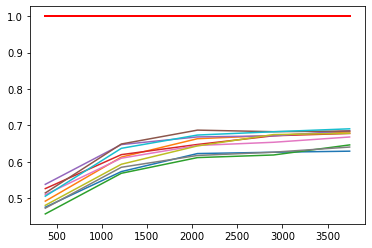

In [33]:
plt.plot(n,train,color='red')
plt.plot(n,val)